# Search for regular expression in a PDF

Example notebook for regular expression searching options using the built-in python RegEx Module https://www.w3schools.com/python/python_regex.asp as well as NLTK https://www.nltk.org

#### Python environment installation instructions

General Packages:

    conda install numpy scipy matplotlib jupyter

Specific packages:

    conda install tika

#### Example PDF file

The PDF file used in the example below can be downloaded from:

    https://doi.org/10.1073/pnas.1117201109

In [1]:
# set PDF filename/filepath parameter; this PDF file will be used in all examples; 
pdf_name = '12980.full.pdf'

### Import required packages

In [2]:
# representation of plots
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# import required packages
import os
import fnmatch
from tika import parser
import nltk

## Search regular expression in a specific PDF

#### Read PDF

In [4]:
# read example PDF definded above
parsedPDF = parser.from_file(pdf_name)

In [5]:
pdftext = parsedPDF['content']

In [6]:
pdftext

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n201117201 12980..12985\n\n\nA quantitative quasispecies theory-based model of\nvirus escape mutation under immune selection\nHyung-June Woo and Jaques Reifman1\n\nBiotechnology High Performance Computing Software Applications Institute, Telemedicine and Advanced Technology Research Center, US Army Medical\nResearch and Materiel Command, Fort Detrick, MD 21702\n\nEdited by Peter Schuster, University of Vienna, Vienna, and approved June 28, 2012 (received for review October 18, 2011)\n\nViral infections involve a complex interplay of the immune\nresponse and escape mutation of the virus quasispecies inside a\nsingle host. Although fundamental aspects of such a balance of\nmutation and selection pressure have been established by the qua-\nsispecies theory decades ago, its implications have largely re-\nmained qualitative. Here, we present a quantitative approach to\nmodel the virus evolution under cytotoxic T-lymph

### Search for first instance of given pattern

Use RegEx to find a specific expression defined in the 'pattern'-parameter below.

In [7]:
# search pattern
pattern = ' quasispecies '

In [8]:
# search for first instance of pattern in pdftext, re.M:mulitline, re.I:ignore case
searchObj = re.search(pattern, pdftext, re.M|re.I)

In [9]:
# search results
print ('search pattern found: ', searchObj.group())
print ('position of pattern in text: ', searchObj.span())

search pattern found:   quasispecies 
position of pattern in text:  (76, 90)


In [10]:
# now check at the given text position
print (pdftext[searchObj.span()[0]:searchObj.span()[1]])

 quasispecies 


### Search for all instances of a given pattern

In [11]:
# search for all instances of pattern in pdftext, re.M:mulitline, re.I:ignore case
findObj = re.findall(pattern, pdftext, re.M|re.I)
print('number of instances found: ', len(findObj))

number of instances found:  20


In [12]:
# The result is a list of pattern matching instances
findObj

[' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' Quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ',
 ' quasispecies ']

In [13]:
# Now we want to get a list of all instances and their positions
for match in re.finditer(pattern, pdftext, re.M|re.I):
    print("%s:%s\t%s" % (match.start(), match.end(), match.group()))

76:90	 quasispecies 
615:629	 quasispecies 
976:990	 quasispecies 
2737:2751	 quasispecies 
3056:3070	 quasispecies 
3112:3126	 quasispecies 
3493:3507	 quasispecies 
5770:5784	 quasispecies 
6379:6393	 Quasispecies 
6588:6602	 quasispecies 
10511:10525	 quasispecies 
16015:16029	 quasispecies 
16753:16767	 quasispecies 
21216:21230	 quasispecies 
21859:21873	 quasispecies 
24438:24452	 quasispecies 
27787:27801	 quasispecies 
28218:28232	 quasispecies 
28894:28908	 quasispecies 
39239:39253	 quasispecies 


In [14]:
# Check for positions of given istances in pdftext
pdftext[24438:24452]

' quasispecies '

### Different search patterns and wild cards

RegEx search is possible for exact patterns or using wildcards

In [15]:
# Look for exact expression match
re.findall("viral load", pdftext, re.M|re.I)

['viral load',
 'viral load',
 'viral load',
 'viral load',
 'viral load',
 'viral load',
 'viral load',
 'viral load',
 'Viral load',
 'Viral load',
 'viral load',
 'viral load',
 'viral load',
 'Viral load',
 'viral load',
 'viral load']

In [16]:
# Look for expression within context
re.findall("viral load.*", pdftext, re.M|re.I)

['viral load progression in the latter regime closely',
 'viral load during the acute infection phase can',
 'viral loads and CTL levels reported refer',
 'viral load and WT frequency from',
 'viral loads can be gained from the deterministic con-',
 'viral load and CTL',
 'viral loads in the chronic phase are larger with more fre-',
 'viral load/CTL level: in one regime',
 'Viral load. (B) Frequencies of WT and the dominant escape',
 'Viral load. (B) Total CTL levels. (C) Num-',
 'viral load in linear scale for p ¼ 1.0 × 10−3 d−1 and μ ¼ 1.0 ×',
 'viral loads that decrease either rapidly',
 'viral load reaches',
 'Viral load. (B) Total CTL levels.',
 'viral load in chronic infection may have',
 'viral load.']

In [17]:
# different search: exact expression does not return results if words are not directly adjacent
re.findall("viral levels.*", pdftext, re.M|re.I)

[]

In [18]:
# search for two words within same sentence
re.findall("viral.* levels.*", pdftext, re.M|re.I)

['viral loads and CTL levels reported refer',
 'Viral load. (B) Total CTL levels. (C) Num-',
 'Viral load. (B) Total CTL levels.']

## Process PDF with Natural Language Toolkit

NLTK provides a number of different and complementary options for pattern matching

### NLTK tokenization options

NLTK Tokenizer can be costumized to yield specific types of expressions

#### Tokenize option 1: Sentence tokenizer

Tokenizer splits text in whole sentences.

In [19]:
# tokenize
sen_tokens = nltk.sent_tokenize(pdftext)

In [20]:
# print sentences
for num, sentence in enumerate(sen_tokens):
    print("sentence Nr. ", num, ":")
    print(sentence)
    print('----------------------------------------------------------------------------')

sentence Nr.  0 :





































201117201 12980..12985


A quantitative quasispecies theory-based model of
virus escape mutation under immune selection
Hyung-June Woo and Jaques Reifman1

Biotechnology High Performance Computing Software Applications Institute, Telemedicine and Advanced Technology Research Center, US Army Medical
Research and Materiel Command, Fort Detrick, MD 21702

Edited by Peter Schuster, University of Vienna, Vienna, and approved June 28, 2012 (received for review October 18, 2011)

Viral infections involve a complex interplay of the immune
response and escape mutation of the virus quasispecies inside a
single host.
----------------------------------------------------------------------------
sentence Nr.  1 :
Although fundamental aspects of such a balance of
mutation and selection pressure have been established by the qua-
sispecies theory decades ago, its implications have largely re-
mained qualitative.
------------------------------------

sentence Nr.  267 :
Naturwissenschaften 58:465–523.
----------------------------------------------------------------------------
sentence Nr.  268 :
2.
----------------------------------------------------------------------------
sentence Nr.  269 :
Swetina J, Schuster P (1982) Self-replication with errors: A model for polynucleotide
replication.
----------------------------------------------------------------------------
sentence Nr.  270 :
Biophys Chem 16:329–345.
----------------------------------------------------------------------------
sentence Nr.  271 :
3.
----------------------------------------------------------------------------
sentence Nr.  272 :
Loeb LA, et al.
----------------------------------------------------------------------------
sentence Nr.  273 :
(1999) Lethal mutagenesis of HIV with mutagenic nucleoside analogs.
----------------------------------------------------------------------------
sentence Nr.  274 :
Proc Natl Acad Sci USA 96:1492–1497.
------------------

PLoS Comput Biol 4:e1000103.
----------------------------------------------------------------------------
sentence Nr.  338 :
22.
----------------------------------------------------------------------------
sentence Nr.  339 :
Love TM, Thurston SW, Keefer MC, Dewhurst S, Lee HY (2010) Mathematical modeling
of ultradeep sequencing data reveals that acute CD8þ T-lymphocyte responses exert
strong selective pressure in simian immunodeficiency virus-infected macaques but still
fail to clear founder epitope sequences.
----------------------------------------------------------------------------
sentence Nr.  340 :
J Virol 84:5802–5814.
----------------------------------------------------------------------------
sentence Nr.  341 :
23.
----------------------------------------------------------------------------
sentence Nr.  342 :
Lee HY, et al.
----------------------------------------------------------------------------
sentence Nr.  343 :
(2009) Modeling sequence evolution in acute HIV-1 inf

#### Tokenize option 2: regular expression tokenizer without numbers

In [21]:
# setup custom tokenizer
rtokenizer = nltk.RegexpTokenizer('[a-zA-Z]\w+\'?\w*') 

In [22]:
# get tokens
rtokenizer.tokenize(pdftext)

['quantitative',
 'quasispecies',
 'theory',
 'based',
 'model',
 'of',
 'virus',
 'escape',
 'mutation',
 'under',
 'immune',
 'selection',
 'Hyung',
 'June',
 'Woo',
 'and',
 'Jaques',
 'Reifman1',
 'Biotechnology',
 'High',
 'Performance',
 'Computing',
 'Software',
 'Applications',
 'Institute',
 'Telemedicine',
 'and',
 'Advanced',
 'Technology',
 'Research',
 'Center',
 'US',
 'Army',
 'Medical',
 'Research',
 'and',
 'Materiel',
 'Command',
 'Fort',
 'Detrick',
 'MD',
 'Edited',
 'by',
 'Peter',
 'Schuster',
 'University',
 'of',
 'Vienna',
 'Vienna',
 'and',
 'approved',
 'June',
 'received',
 'for',
 'review',
 'October',
 'Viral',
 'infections',
 'involve',
 'complex',
 'interplay',
 'of',
 'the',
 'immune',
 'response',
 'and',
 'escape',
 'mutation',
 'of',
 'the',
 'virus',
 'quasispecies',
 'inside',
 'single',
 'host',
 'Although',
 'fundamental',
 'aspects',
 'of',
 'such',
 'balance',
 'of',
 'mutation',
 'and',
 'selection',
 'pressure',
 'have',
 'been',
 'establishe

In [23]:
# get tokenizer spans (locations in text)
spans = list(rtokenizer.span_tokenize(pdftext))
spans

[(64, 76),
 (77, 89),
 (90, 96),
 (97, 102),
 (103, 108),
 (109, 111),
 (112, 117),
 (118, 124),
 (125, 133),
 (134, 139),
 (140, 146),
 (147, 156),
 (157, 162),
 (163, 167),
 (168, 171),
 (172, 175),
 (176, 182),
 (183, 191),
 (193, 206),
 (207, 211),
 (212, 223),
 (224, 233),
 (234, 242),
 (243, 255),
 (256, 265),
 (267, 279),
 (280, 283),
 (284, 292),
 (293, 303),
 (304, 312),
 (313, 319),
 (321, 323),
 (324, 328),
 (329, 336),
 (337, 345),
 (346, 349),
 (350, 358),
 (359, 366),
 (368, 372),
 (373, 380),
 (382, 384),
 (392, 398),
 (399, 401),
 (402, 407),
 (408, 416),
 (418, 428),
 (429, 431),
 (432, 438),
 (440, 446),
 (448, 451),
 (452, 460),
 (461, 465),
 (476, 484),
 (485, 488),
 (489, 495),
 (496, 503),
 (515, 520),
 (521, 531),
 (532, 539),
 (542, 549),
 (550, 559),
 (560, 562),
 (563, 566),
 (567, 573),
 (574, 582),
 (583, 586),
 (587, 593),
 (594, 602),
 (603, 605),
 (606, 609),
 (610, 615),
 (616, 628),
 (629, 635),
 (638, 644),
 (645, 649),
 (651, 659),
 (660, 671),
 (672,

#### Tokenize option 3: only expressions with dashes

Reduce tokenizer to specific expression; here we use dashes

In [24]:
#setup custom tokenizer
rtokenizer = nltk.RegexpTokenizer('\w*[a-zA-Z]-[a-zA-Z]\w+\'?\w*') 

In [25]:
# tokenize
rtokenizer.tokenize(pdftext)

['theory-based',
 'Hyung-June',
 'T-lymphocyte',
 'wild-type',
 'sequence-specific',
 'real-world',
 'next-generation',
 'Next-generation',
 'T-lymphocyte',
 'sequence-based',
 'quasispecies-based',
 'cell-based',
 'E-mail',
 'single-peak',
 'wild-type',
 'virus-immune',
 'infection-clearance',
 'single-peak',
 'single-nucleotide',
 'near-exponential',
 'single-epitope',
 'gle-epitope',
 'quasispecies-based',
 'half-life',
 'one-half',
 'half-life',
 'half-life',
 'infection-immune',
 'multiple-epitope',
 'multi-epitope',
 'host-cell',
 'T-cell',
 'HLA-epitope',
 'genome-wide',
 'CTL-mediated',
 'antibody-based',
 'genotype-phenotype',
 'In-House',
 'Self-replication',
 'Next-generation',
 'T-lymphocyte',
 'virus-infected',
 'Whole-genome',
 'Epitope-specific',
 'cross-recognize',
 'HLA-restricted',
 'T-cell',
 'T-cell',
 'T-lymphocyte',
 'virus-infected',
 'Tat-specific']

#### Tokenize option 4: only numbers

Reduce tokenizer to specific numters and special characters

In [26]:
# setup custom tokenizer
rtokenizer = nltk.RegexpTokenizer('[0-9_]\w+\'?\w*') 

In [27]:
# tokenize and print number of tokens and tokens list
rtokens = rtokenizer.tokenize(pdftext)
print (len(rtokens))
rtokens

519


['201117201',
 '12980',
 '12985',
 '21702',
 '28',
 '2012',
 '18',
 '2011',
 '8þ',
 '10',
 '12',
 '10',
 '13',
 '15',
 '16',
 '17',
 '18',
 '20',
 '21',
 '22',
 '23',
 '24',
 '11',
 '17',
 '25',
 '1To',
 '10',
 '1073',
 '1117201109',
 '12980',
 '12985',
 '2012',
 '109',
 '32',
 '10',
 '1073',
 '1117201109',
 '23',
 '02',
 '10',
 '1073',
 '1117201109',
 '10',
 '1073',
 '1117201109',
 '10',
 '1073',
 '1117201109',
 '10',
 '1073',
 '1117201109',
 '10',
 '1073',
 '1117201109',
 '10',
 '1073',
 '1117201109',
 '_nj',
 '3Þdðj',
 '26',
 '10',
 '3La',
 '30',
 '4L',
 '1018',
 '27',
 '104',
 '106',
 '109',
 '106',
 '18',
 '19',
 '3A',
 '3B',
 '3C',
 '3D',
 '3B',
 '3C',
 '3D',
 '_nj',
 '4A',
 '_cðαÞ',
 '4B',
 '01',
 '10',
 '10',
 '28',
 '29',
 '30',
 '31',
 '34',
 '35',
 '36',
 '37',
 '2012',
 '109',
 '32',
 '12981',
 '23',
 '02',
 '10',
 '1073',
 '1117201109',
 '1117201109_SI',
 '10',
 '1073',
 '1117201109',
 '1117201109_SI',
 '10',
 '1073',
 '1117201109',
 '1117201109_SI',
 '10',
 '1073',
 '1117

#### Tokenize option 5: standard option

Get all expressions from tokenizer

In [28]:
# standard word tokenizer
tokens = nltk.word_tokenize(pdftext)
print (len(tokens))

7851


In [29]:
tokens

['201117201',
 '12980..12985',
 'A',
 'quantitative',
 'quasispecies',
 'theory-based',
 'model',
 'of',
 'virus',
 'escape',
 'mutation',
 'under',
 'immune',
 'selection',
 'Hyung-June',
 'Woo',
 'and',
 'Jaques',
 'Reifman1',
 'Biotechnology',
 'High',
 'Performance',
 'Computing',
 'Software',
 'Applications',
 'Institute',
 ',',
 'Telemedicine',
 'and',
 'Advanced',
 'Technology',
 'Research',
 'Center',
 ',',
 'US',
 'Army',
 'Medical',
 'Research',
 'and',
 'Materiel',
 'Command',
 ',',
 'Fort',
 'Detrick',
 ',',
 'MD',
 '21702',
 'Edited',
 'by',
 'Peter',
 'Schuster',
 ',',
 'University',
 'of',
 'Vienna',
 ',',
 'Vienna',
 ',',
 'and',
 'approved',
 'June',
 '28',
 ',',
 '2012',
 '(',
 'received',
 'for',
 'review',
 'October',
 '18',
 ',',
 '2011',
 ')',
 'Viral',
 'infections',
 'involve',
 'a',
 'complex',
 'interplay',
 'of',
 'the',
 'immune',
 'response',
 'and',
 'escape',
 'mutation',
 'of',
 'the',
 'virus',
 'quasispecies',
 'inside',
 'a',
 'single',
 'host',
 '.',

## NLTK analysis of tokenized text

Use different NLTK options to analyze tokenize text

#### General options for tokenized text

In [30]:
text = nltk.Text(tokens)

In [31]:
# text name
print ('text name: ', text.name)

text name:  201117201 12980..12985 A quantitative quasispecies theory-based model of...


In [32]:
# Collocations: words occuring together
text.collocations(num=10)

immune response; Acad Sci; Natl Acad; Proc Natl; Sci USA; viral load;
mutation rate; sequence space; amino acid; disease progression


#### Find sepcific expression and context information within tokenized text

In [33]:
# occurances of expression within context
text.concordance('immune', width=100, lines=3)

Displaying 3 of 25 matches:
 immune selection Hyung-June Woo and Jaques 
s involve a complex interplay of the immune response and escape mutation of the 
olution under cytotoxic T-lymphocyte immune response . The virus quasispecies dy


In [34]:
text.concordance("quasispecies", width=100, lines=3)

Displaying 3 of 25 matches:
 quasispecies theory-based model of virus escap
 and escape mutation of the virus quasispecies inside a single host . Although f
ocyte immune response . The virus quasispecies dynamics are explicitly repre- se


In [35]:
# count number of occurences
text.count('quasispecies')

24

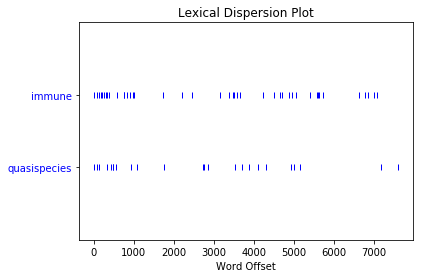

In [36]:
# Dispersion plot for word occurences
text.dispersion_plot(['immune', 'quasispecies'])

In [37]:
# find other words which appear in the same context
text.similar('immune')

selection first virus dominant epitope ctl viral


In [38]:
# find other words which appear in the same context
text.similar('quasispecies')

evolutionary quantitative population sispecies sense observation


### Find text pattern with NLTK findall()

Patterns can be found with the findall() functions; this provides partially the same information as RegEx above, but also has additional options

#### Different options for finding a regular expression

In [39]:
# find regular expression
text.findall(r"<immune><response>")

immune response; immune response; immune response; immune response;
immune response; immune response; immune response; immune response;
immune response; immune response; immune response; immune response;
immune response; immune response


In [40]:
# find regular expression and context option 1
text.findall(r"<.*><immune><response>")

the immune response; T-lymphocyte immune response; the immune
response; the immune response; of immune response; of immune response;
of immune response; cellular immune response; of immune response; via
immune response; of immune response; overall immune response; CTL-
mediated immune response; The immune response


In [41]:
# find regular expression and context option 2
text.findall(r"<.*><immune><response><.*>")

the immune response and; T-lymphocyte immune response .; the immune
response :; the immune response .; of immune response among; of immune
response during; of immune response and; cellular immune response
provides; of immune response ,; via immune response ,; of immune
response during; overall immune response .; CTL-mediated immune
response ,; The immune response during


In [42]:
# find expression context
text.findall(r"(<.*>)<immune><response><.*>")

the; T-lymphocyte; the; the; of; of; of; cellular; of; via; of;
overall; CTL-mediated; The


In [43]:
# find regular expression and one word of context before and after expression
text.findall(r"<..*><immune><response><..*>")

the immune response and; T-lymphocyte immune response .; the immune
response :; the immune response .; of immune response among; of immune
response during; of immune response and; cellular immune response
provides; of immune response ,; via immune response ,; of immune
response during; overall immune response .; CTL-mediated immune
response ,; The immune response during


In [44]:
# find regular expression and two words of context before and after expression
text.findall(r"<.*><.*><immune><response><.*><.*>")

of the immune response and escape; cytotoxic T-lymphocyte immune
response . The; of the immune response : It; by the immune response .
Our; patterns of immune response among patients; characteristics of
immune response during early; range of immune response and escape; the
cellular immune response provides the; effectiveness of immune
response , and; occur via immune response , which; deterioration of
immune response during HIV-1; the overall immune response . We; the
CTL-mediated immune response , we; ) The immune response during acute


In [45]:
# find regular expression and context using wildcards
text.findall(r"<.*><.*><.*m.*><response><.*><.*>")

of the immune response and escape; cytotoxic T-lymphocyte immune
response . The; of the immune response : It; by the immune response .
Our; patterns of immune response among patients; characteristics of
immune response during early; range of immune response and escape; the
cellular immune response provides the; of viral infection-immune
response dynamics within; effectiveness of immune response , and;
occur via immune response , which; deterioration of immune response
during HIV-1; the overall immune response . We; the CTL-mediated
immune response , we; ) The immune response during acute


#### Different options for finding patterns in the text

In [46]:
# sequence of three equal first letters starting with t
text.findall(r"<t.*>{3,}")

that the total; to take their; that the total


In [47]:
# sequence of two equal first letters starting with e
text.findall(r"<e.*>{2,}")

exhaustive enumerations; empirical evidence; experimental estimate;
extinction events; epistatic effects; early evolu-; epitope escape;
entire expressed


In [48]:
# sequence of two words ending on 'nd'
text.findall(r"<.*nd>{2,}")

and found


In [49]:
# sequence of two words containing 'nd'
text.findall(r"<.*nd.*>{2,}")

and expanded; landscape beyond; and found


In [50]:
# find two directly adjacent words
text.findall(r"<\w*> <and> <the> <\w*>")

theory and the population; WT and the distribution; WT and the
dominant; b and the clearance; matter and the evolution; frequencies
and the onset


In [51]:
# find two words  with a word in between
text.findall(r"<the> <\w*> <immune> <\w*>")

the cellular immune response; the full immune escape; the given immune
system; the overall immune response


In [52]:
# find two words with two words in between
text.findall(r"<the> <\w*> <\w*> <immune> <\w*>")

the effectiveness of immune response


In [53]:
# find all digits
text.findall("<\d>")

1; 1; 1; 2; 6; 7; 9; 7; 7; 2; 0; 1; 1; 2; 2; 1; 7; 5; 1; 2; 0; 4; 0;
1; 3; 7; 2; 0; 9; 1; 3; 2; 2; 4; 3; 9; 2; 3; 0; 0; 2; 4; 6; 8; 0; 0;
1; 9; 1; 1; 2; 3; 4; 0; 1; 2; 3; 0; 1; 2; 3; 4; 0; 2; 1; 1; 2; 0; 2;
7; 3; 4; 2; 3; 1; 2; 3; 4; 0; 1; 2; 3; 4; 1; 2; 3; 4; 1; 2; 3; 3; 2;
0; 1; 2; 3; 4; 2; 7; 2; 0; 3; 3; 0; 1; 1; 1; 1; 8; 1; 3; 1; 2; 3; 4;
5; 6; 7; 8; 6; 9; 5; 1; 4; 4; 2; 0; 6; 1; 1; 7; 2; 0
